Problem:
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

Steps to Follow:
Problem Statement,
Hypothesis Generation,
Getting the system ready and loading the data,
Understanding the data,
EDA,
Perform Univariate Analysis,
Perform Bivariate Analysis,
Missing value and outlier treatment,
Evaluation Metrics for classification problem,
Model building: part 1 (Apply ML classification algorithms),
Feature engineering,
Model building: part 2 (Apply ML classification algorithms),

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

td = pd.read_csv(r"C:\Users\kingED\Downloads\loan_sanction_train.csv")
td

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:

# dropping missing data
td.dropna(inplace=True)
# use averageto fill missing columns for credit history
td['Credit_History'] = td['Credit_History'].fillna(td['Credit_History'].mean())
print(td.isna().sum())
print(td.info())
# saving the csv
td.to_csv(r"C:\Users\kingED\Downloads\train.csv")


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            523 non-null    object 
 1   Gender             523 non-null    object 
 2   Married            523 non-null    object 
 3   Dependents         523 non-null    object 
 4   Education          523 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    523 non-null    int64  
 7   CoapplicantIncome  523 non-null    float64
 8   LoanAmount         523 non-null    float64
 9   Loan_Amount_Term   523 non-null    float64
 10  Cr

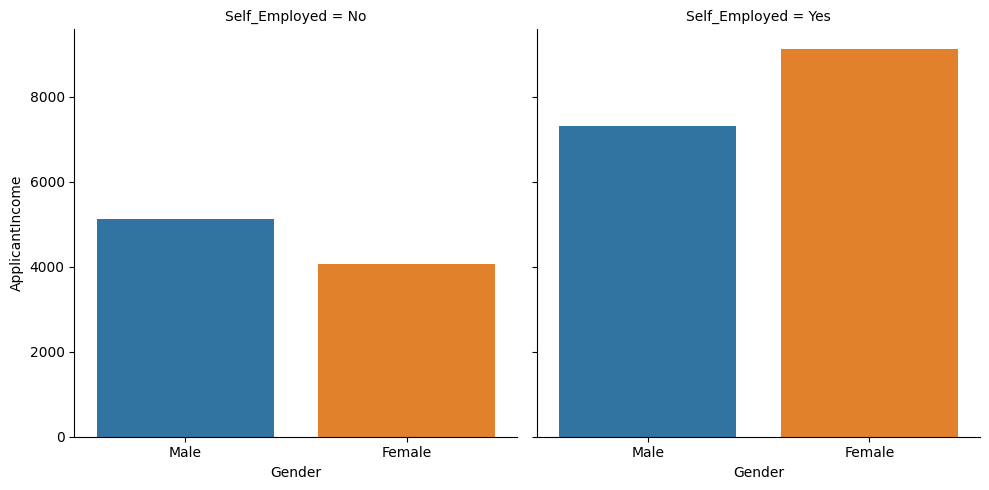

In [33]:
sns.catplot(x='Gender', y='ApplicantIncome', kind='bar', data=td, col='Self_Employed', errorbar=None)
plt.show()